# FitNotes Test
## Marshall Ferguson - 12/2021

The goal of this notebook is to successfully implement a ML model that can predict how much weight I will be able to lift for a given exercise on a given date.

For example: Based on the data, how much will I be able to bench press for 10 reps on 10/5/2022

In [1]:
# Imports

import datetime
import pandas as pd

In [23]:
# Import Data

df = pd.read_csv(r'..\test_data\FitNotes_Test_Data.csv')

df.head()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time
0,2020-07-11,Flat Barbell Bench Press,Chest,45.0,12.0,NaN,NaN,NaN
1,2020-07-11,Flat Barbell Bench Press,Chest,65.0,8.0,NaN,NaN,NaN
2,2020-07-11,Flat Barbell Bench Press,Chest,95.0,6.0,NaN,NaN,NaN
3,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN
4,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN


Looking at the data a little more closely, it looks like it will be easier to predict the volume lifted on a given day rather than predicting the weight for a given number of reps. Let's focus on predicting volume for now, and see where that leads us.

In [24]:
df['Volume (lbs)'] = df['Weight (lbs)'] * df['Reps']

df.head()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time,Volume (lbs)
0,2020-07-11,Flat Barbell Bench Press,Chest,45.0,12.0,NaN,NaN,NaN,540.0
1,2020-07-11,Flat Barbell Bench Press,Chest,65.0,8.0,NaN,NaN,NaN,520.0
2,2020-07-11,Flat Barbell Bench Press,Chest,95.0,6.0,NaN,NaN,NaN,570.0
3,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0
4,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0


Since we are trying to predict Bench Press volume, let's pull out just the Bench Press data from the original DataFrame.

In [46]:
df_bench_press = df.where(df['Exercise'] == 'Flat Barbell Bench Press')

df_bench_press.head()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time,Volume (lbs)
0,2020-07-11,Flat Barbell Bench Press,Chest,45.0,12.0,NaN,NaN,NaN,540.0
1,2020-07-11,Flat Barbell Bench Press,Chest,65.0,8.0,NaN,NaN,NaN,520.0
2,2020-07-11,Flat Barbell Bench Press,Chest,95.0,6.0,NaN,NaN,NaN,570.0
3,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0
4,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0


In [47]:
df_bench_press.shape

(2066, 9)

We selected all the rows where the Exercise is Flat Barbell Bench Press, but kept all the remaining empty rows. Let't get rid of the rows with all NaN's.

In [48]:
df_bench_press = df_bench_press.dropna(how='all')

df_bench_press.shape

(308, 9)

Let's pull the date of the first recorded workout so we can calculate how many days have passed since then.

In [49]:
first_day = datetime.datetime.strptime(df['Date'][0], '%Y-%m-%d').date()

first_day

datetime.date(2020, 7, 11)

In [50]:
days_since_first_td = []
for date in df_bench_press['Date']:
    days_since_first_td.append(datetime.datetime.strptime(date, '%Y-%m-%d').date() - first_day)

days_since_first_td

[datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(days=2),
 datetime.timedelta(days=2),
 datetime.timedelta(days=2),
 datetime.timedelta(days=2),
 datetime.timedelta(days=2),
 datetime.timedelta(days=2),
 datetime.timedelta(days=19),
 datetime.timedelta(days=19),
 datetime.timedelta(days=19),
 datetime.timedelta(days=19),
 datetime.timedelta(days=19),
 datetime.timedelta(days=19),
 datetime.timedelta(days=19),
 datetime.timedelta(days=19),
 datetime.timedelta(days=23),
 datetime.timedelta(days=23),
 datetime.timedelta(days=23),
 datetime.timedelta(days=23),
 datetime.timedelta(days=23),
 datetime.timedelta(days=30),
 datetime.timedelta(days=30),
 datetime.timedelta(days=30),
 datetime.timedelta(days=30),
 datetime.timedelta(days=30),
 datetime.timedelta(days=53),
 datetime.timedelta(days=53),
 datetime.timedelta(days=53),
 dat

In [51]:
days_since_first_int = []
for day in days_since_first_td:
    days_since_first_int.append(day.days)

days_since_first_int

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 23,
 23,
 23,
 23,
 23,
 30,
 30,
 30,
 30,
 30,
 53,
 53,
 53,
 53,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 69,
 69,
 69,
 69,
 69,
 69,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 76,
 76,
 76,
 76,
 76,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 83,
 83,
 83,
 83,
 83,
 83,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 113,
 113,
 113,
 113,
 113,
 117,
 117,
 117,
 117,
 136,
 136,
 136,
 136,
 136,
 136,
 136,
 136,
 136,
 136,
 136,
 158,
 158,
 158,
 158,
 158,
 158,
 158,
 158,
 158,
 158,
 158,
 202,
 202,
 202,
 202,
 202,
 205,
 205,
 205,
 205,
 205,
 209,
 209,
 209,
 209,
 209,
 209,
 209,
 209,
 209,
 214,
 214,
 214,
 214,
 214,
 214,
 214,
 214,
 214,
 214,
 214,
 264,
 264,
 264,
 264,
 264,
 264,
 264,
 264,
 264,
 276,
 276,
 276,
 276,
 276,
 276,
 276,
 276,
 276,
 279,
 279,
 279,
 279,
 283,
 283,
 283,
 283,
 283,
 283,
 290,
 290

In [52]:
df_bench_press['Days Since First Date'] = days_since_first_int

df_bench_press.head()

,Date,Exercise,Category,Weight (lbs),Reps,Distance,Distance Unit,Time,Volume (lbs),Days Since First Date
0,2020-07-11,Flat Barbell Bench Press,Chest,45.0,12.0,NaN,NaN,NaN,540.0,0
1,2020-07-11,Flat Barbell Bench Press,Chest,65.0,8.0,NaN,NaN,NaN,520.0,0
2,2020-07-11,Flat Barbell Bench Press,Chest,95.0,6.0,NaN,NaN,NaN,570.0,0
3,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0,0
4,2020-07-11,Flat Barbell Bench Press,Chest,105.0,6.0,NaN,NaN,NaN,630.0,0


We want the sum total of the Volume lifted during the Bench Press, but we want the Days Since First Date to stay constant. (Doing more sets increases volume, but they all happen on the same day) We can accomplish this by grouping by the Date and Days Since First Date columns, and then resetting the index.

In [53]:
df_bench_group_date = df_bench_press.groupby(['Date', 'Days Since First Date'])[['Weight (lbs)', 'Reps', 'Volume (lbs)']].sum()

df_bench_group_date

,,Weight (lbs),Reps,Volume (lbs)
Date,Days Since First Date,,,
2020-07-11,0,730.0,60.0,5200.0
2020-07-13,2,390.0,69.0,4365.0
2020-07-30,19,720.0,60.0,5020.0
2020-08-03,23,225.0,25.0,1125.0
2020-08-10,30,250.0,25.0,1250.0
2020-09-02,53,390.0,23.0,1905.0
2020-09-09,60,970.0,39.0,4005.0
2020-09-15,66,890.0,47.0,4725.0
2020-09-18,69,530.0,66.0,5590.0


In [54]:
df_bench_group_date = df_bench_group_date.reset_index()

df_bench_group_date

,Date,Days Since First Date,Weight (lbs),Reps,Volume (lbs)
0,2020-07-11,0,730.0,60.0,5200.0
1,2020-07-13,2,390.0,69.0,4365.0
2,2020-07-30,19,720.0,60.0,5020.0
3,2020-08-03,23,225.0,25.0,1125.0
4,2020-08-10,30,250.0,25.0,1250.0
5,2020-09-02,53,390.0,23.0,1905.0
6,2020-09-09,60,970.0,39.0,4005.0
7,2020-09-15,66,890.0,47.0,4725.0
8,2020-09-18,69,530.0,66.0,5590.0
9,2020-09-22,73,930.0,48.0,4980.0


After organizing and cleaning the data, let's see a correlation matrix.

In [55]:
df_bench_group_date.corr()

,Days Since First Date,Weight (lbs),Reps,Volume (lbs)
Days Since First Date,1.000000,-0.013929,0.052124,0.057275
Weight (lbs),-0.013929,1.000000,0.218064,0.556663
Reps,0.052124,0.218064,1.000000,0.862075
Volume (lbs),0.057275,0.556663,0.862075,1.000000


Unfortunately, the time passed since the first recorded workout does not have much effect on how much I am lifting. This is unfortunate becasue it indicates that I have not been improving over time.

<AxesSubplot:xlabel='Days Since First Date'>

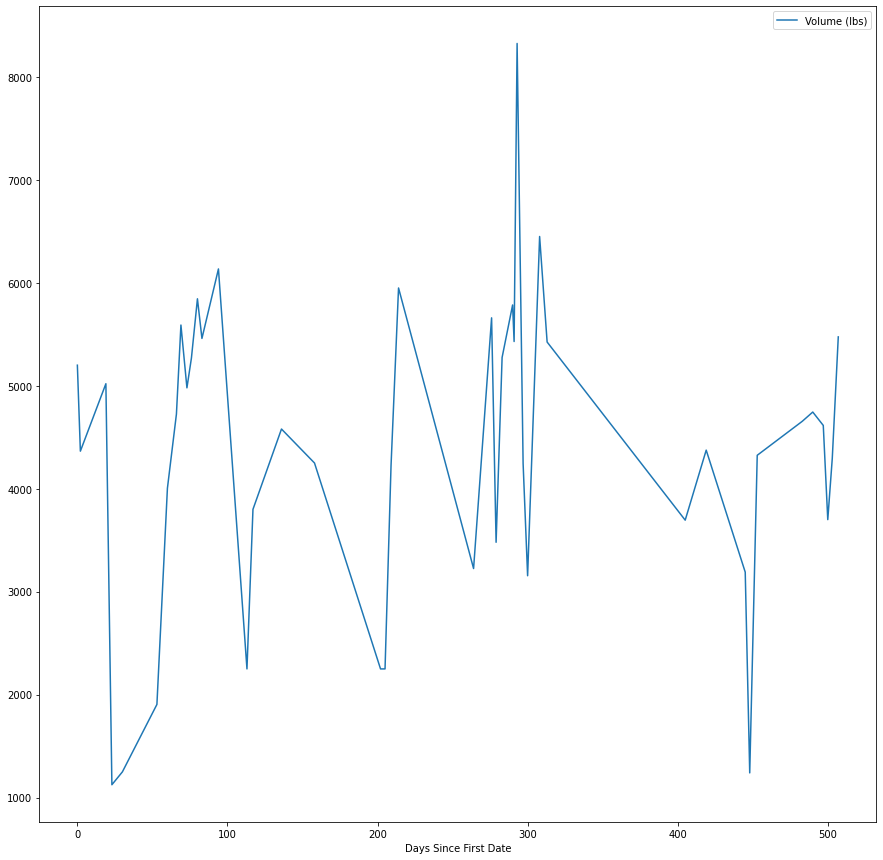

In [56]:
df_bench_group_date.plot(x='Days Since First Date', y='Volume (lbs)', figsize=[15,15])

The original point of the notebook was to run a linear regression to predict how much I could lift for a given exercise on a given future date based on my progress so far. Along the way, we switched to how much volume I would be able to lift in the future for a specific exercise to make the analysis a bit easier. However, since there is little to no correlation between the days past since the first recorded workout and the volume lifted, I do not see the point in running this regression.

Since we were unable to do much with the Bench Press data, let's try another exercise: my personal favorite, the Deadlift.